In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)


In [2]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

In [3]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


In [4]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)


2.568 0.0
0.0012279435128768027 0.00047817114987414434 0.0


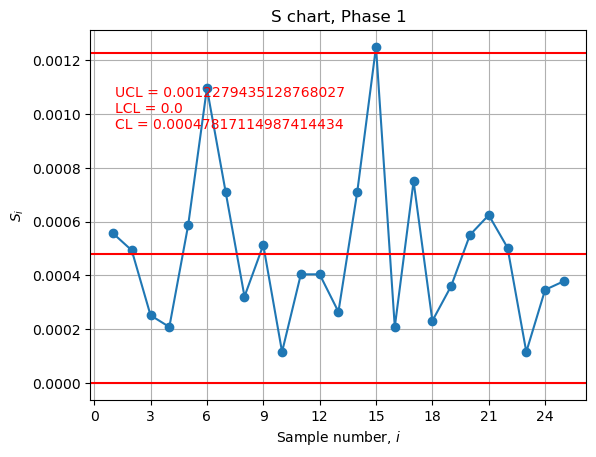

In [5]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()


In [6]:
UCL_s

0.0012279435128768027

In [7]:
s

1     0.000557
2     0.000493
3     0.000252
4     0.000208
5     0.000586
6     0.001097
7     0.000709
8     0.000321
9     0.000513
10    0.000115
11    0.000404
12    0.000404
13    0.000265
14    0.000709
15    0.001250
16    0.000208
17    0.000751
18    0.000231
19    0.000361
20    0.000551
21    0.000624
22    0.000503
23    0.000115
24    0.000346
25    0.000379
dtype: float64

In [8]:
s.ge(UCL_s)

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

In [9]:
s.le(LCL_s)

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

s.le(LCL_s)

In [10]:
Mask_to_remove_1=[s_i < LCL_s or s_i > UCL_s for s_i in list(s)]
Mask_to_remove_1
# #Equvilantely
# Mask_to_remove_1=(s.ge(UCL_s) | s.le(LCL_s))

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [11]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_1]=np.nan
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


In [12]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)


2.568 0.0
0.0011453221640009574 0.000445997727414703 0.0


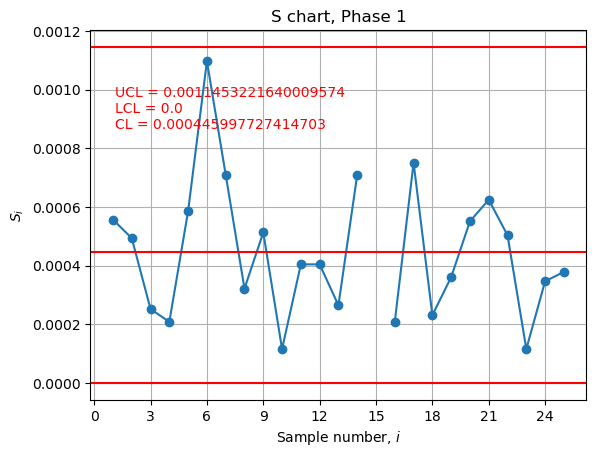

In [13]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()

# End of week 5. (o6 Feb 2023)
# Start of week 6

# Next Phase #1 for the X_bar

In [14]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_1]=np.nan # Use only the samples that are within the control limits of S chart from phase 1
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


0.06381453511492388 0.06294305555555556 0.06207157599618723


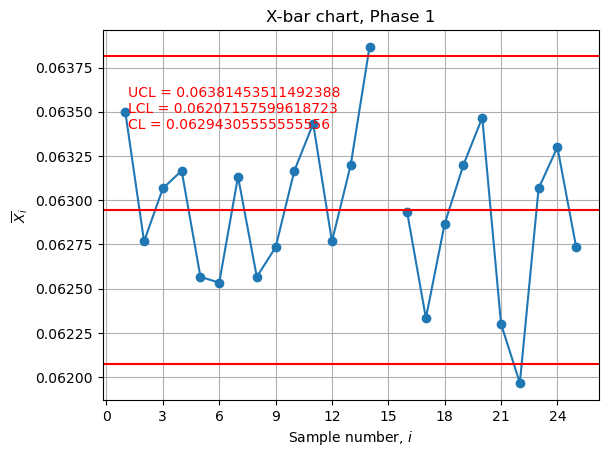

In [15]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()

In [16]:
Mask_to_remove_2=[x_i < LCL_x_bar or x_i > UCL_x_bar for x_i in list(xbar)]


In [17]:
Mask_to_remove_2

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

In [18]:

Mask_to_remove_21=[Mask_to_remove_1[i] or Mask_to_remove_2[i] for i in range(len(Mask_to_remove_1))]

In [19]:
Mask_to_remove_21

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]

In [20]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_21]=np.nan
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


0.06381693410482286 0.06294545454545454 0.06207397498608621


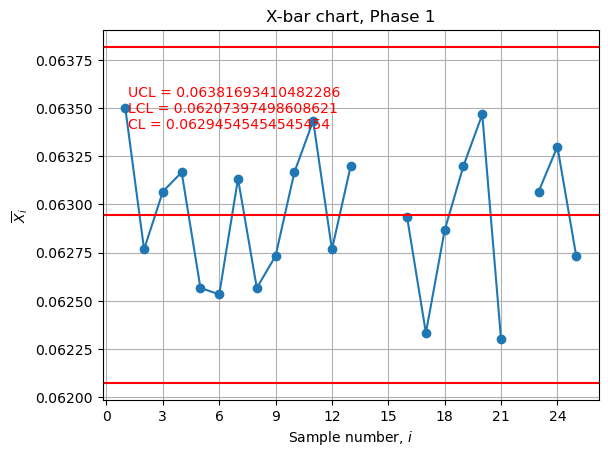

In [21]:
xbar=df.mean(axis=1) #mean for each sample
x_bar_bar=xbar.mean() #mean of all sample means
A3=AppendixVI(n,factor='A3')
UCL_x_bar=x_bar_bar+A3*s_bar
LCL_x_bar=x_bar_bar-A3*s_bar
CL_x_bar=x_bar_bar
print(UCL_x_bar,CL_x_bar,LCL_x_bar)

ax = plt.figure().gca()
ax.plot(xbar.index,xbar,marker="o")
ax.axhline(y = UCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = LCL_x_bar, color = 'r', linestyle = '-')
ax.axhline(y = CL_x_bar, color = 'r', linestyle = '-')
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_x_bar, LCL_x_bar, CL_x_bar),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('X-bar chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$\overline{X}_i$')
plt.show()

# X bar chart phase 1 is done (for now)
## Next we make sure that we still have stable (aka everything in bound) in the s chart

In [22]:
df=pd.read_csv("DataLab5_B_MIE304.csv",header=None)
df=df.iloc[1:,1:]
# use mask to keep only the rows that are within the control limits
df[Mask_to_remove_21]=np.nan #Note that we are using the same last mask, 
#because nothing was OUTSIDE the control limits of the X-bar chart after revising it.
df

,1,2,3
1,0.0629,0.0636,0.0640
2,0.0630,0.0631,0.0622
3,0.0628,0.0631,0.0633
4,0.0634,0.0630,0.0631
5,0.0619,0.0628,0.0630
6,0.0613,0.0629,0.0634
7,0.0630,0.0639,0.0625
8,0.0628,0.0627,0.0622
9,0.0623,0.0626,0.0633
10,0.0631,0.0631,0.0633


2.568 0.0
0.0011078776039609075 0.00043141651244583626 0.0


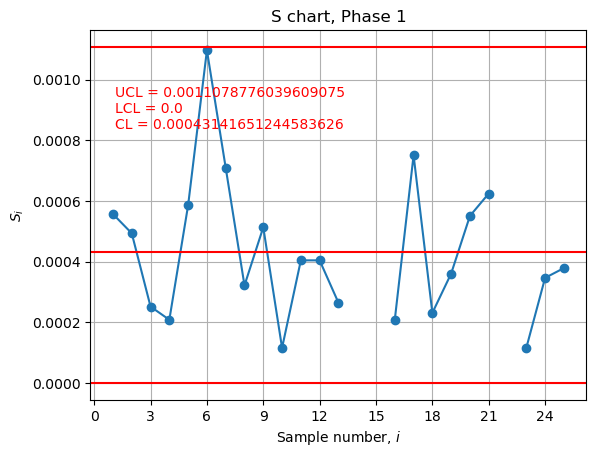

In [23]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
n=df.shape[1]
B_4=AppendixVI(n,factor='B4')
B_3=AppendixVI(n,factor='B3')
print(B_4,B_3)
UCL_s=s_bar*B_4
LCL_s=s_bar*B_3
CL_s=s_bar
print(UCL_s,CL_s,LCL_s)

ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()

# Luckly everything is still in bound for s chart. If not we would have started this process for one more cycle.
## Now we can move to the process paramater estimation to conclude phase 1 

In [24]:
c_4=AppendixVI(n,factor='c4')
sigma=s_bar/c_4 #estimated of process standard deviation, think of sigma_o in hypothesis testing
print(sigma)
mu=x_bar_bar #estimated of process mean, think of mu_o in hypothesis testing
print(mu)

0.0004868161954929319
0.06294545454545454


# End of phase 1 now we can use this chart for next phase 2 and do actual process montoring.